# 3W Toolkit

**Versão:** 2.0.0  
**Autores:** Bruno Coelho Martins, Carla Pagliari, Eduardo A. B. Silva, Eduardo Henrique, Fernanda Duarte Vilela Reis de Oliveira, Gabriel Henrique Braga Lisboa, Luiza Helena de Andrade Leite, Marcello Campos, Matheus Ferreira Espirito Santo, Matheus Ramos Parracho, Natanael Moura Junior, Pedro Braga Lisboa, Rafael Padilla, Sergio Lima Netto, Thadeu Luiz Barbosa Dias, Umberto Augusto.  
**Descrição:** Notebook demonstrativo com as principais funcionalidades do *3W Toolkit*.


----


## Sumário
1. Introdução ao 3W Toolkit  
   1.1 Como instalar  
2. Dataset 3W  
   2.1. Download do Dataset  
   2.2. Limpeza e exploração  
3. Pré-processamento  
   3.1. Funcionalidades  
4. Extração de características  
   4.1. Funcionalidades  
5. Análise exploratória  
   5.1. Visualizando as séries temporais  
6. Treinamento e avaliação de modelos  
7. Gerando relatório  
8. Utilizando o Pipeline automatizado  
   8.1. Estrutura  
   8.2. Configurando o Pipeline #Explicação das classes Config do tipo BaseStep.  
   8.3. Executando e avaliando relatório  

----

## 1. Introdução ao 3W toolkit

O **3W Toolkit** é um ambiente de código aberto desenvolvido em parceria entre a Petrobras e a UFRJ, voltado para o **monitoramento de poços de petróleo**. Seu objetivo é fornecer uma infraestrutura modular que permita desenvolver, treinar e avaliar algoritmos de detecção e classificação de falhas operacionais, garantindo **reprodutibilidade** e **comparabilidade** entre experimentos.

O toolkit organiza-se em módulos independentes e combináveis:
- **Dataset**: gestão e versionamento dos dados.  
- **Pré-processamento**: normalização, imputação, balanceamento e janelas temporais.  
- **Extração de atributos**: geração de *features* a partir de séries temporais.  
- **Modelos**: diferentes classificadores e detectores configuráveis.  
- **Avaliação & Métricas**: indicadores padronizados para comparação justa de resultados.  
- **Visualização & Relatórios**: gráficos e documentos para análise clara dos experimentos.

Assim, o 3W Toolkit funciona como um **ecossistema de pesquisa e inovação aplicada**, apoiando a Petrobras e a comunidade acadêmica no avanço de soluções de aprendizado de máquina para a indústria de óleo e gás.


### 1.1 Como instalar o 3W toolkit

O 3W toolkit v.2.0.0 pode ser baixado ou clonado atraves do repositório oficial [https://github.com/petrobras/3W](https://github.com/petrobras/3W) ou pode ser instalado via `pip install ThreeWtoolkit`

In [1]:
### TODO: Quando disponível, mostrar como instalar o projeto via `pip install` ###

-----

## 2. Dataset 3W

**Formato:** Tabular dividido em arquivos no formato [parquet](https://parquet.apache.org/)  
**Hospedado em:** [3W Dataset 2.0.0 - Figshare](https://figshare.com/articles/dataset/3W_Dataset_2_0_0/29205836?file=55019255)  
**Tamanho:** 1.67 GB  
**Divisões:** 10 pastas com arquivos parquet, sendo 1 pasta para cada evento.  
**Licença e uso:** [Apache 2.0](https://github.com/petrobras/3W/?tab=Apache-2.0-1-ov-file#readme)

### 2.2 Baixar o dataset

Vamos fazer o download do dataset utilizando a biblioteca 3W:

In [1]:
# Importando a classe ParquetDataset para baixar e carregar o dataset
from ThreeWToolkit.dataset import ParquetDataset, DatasetConfig
from pathlib import Path

# Definindo o caminho para o dataset
dataset_path = Path("./dataset")

# Criando um objeto ParquetDataset para carregar o dataset
ds_config = DatasetConfig(path=dataset_path, download=True)
ds = ParquetDataset(ds_config)

### 2.3 Limpeza e exploração

In [2]:

# Visualizando o dataset
total_events = len(ds)

total_events

2228

Cada evento do dataset é um dicionário contendo 2 chaves: "signal" e "label"

In [21]:
event_id = 0
type(ds[event_id])

dict

In [22]:
ds[event_id].keys()

dict_keys(['signal', 'label'])

Vamos dar uma olhada no "signal":

In [23]:
ds[event_id]["signal"]

,ABER-CKGL,ABER-CKP,ESTADO-DHSV,ESTADO-M1,ESTADO-M2,ESTADO-PXO,ESTADO-SDV-GL,ESTADO-SDV-P,ESTADO-W1,ESTADO-W2,...,P-PDG,PT-P,P-TPT,QBS,QGL,T-JUS-CKP,T-MON-CKP,T-PDG,T-TPT,state
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-07-04 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,0.0,NaN,-17129300.0,NaN,2.030010,55.14078,NaN,0.0,95.97056,<NA>
2016-07-04 18:00:01,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,0.0,NaN,-17129300.0,NaN,2.028295,55.14299,NaN,0.0,95.96629,<NA>
2016-07-04 18:00:02,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,0.0,NaN,-17129300.0,NaN,2.026579,55.14520,NaN,0.0,95.96203,<NA>
2016-07-04 18:00:03,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,0.0,NaN,-17129300.0,NaN,2.024863,55.14741,NaN,0.0,95.95777,<NA>
2016-07-04 18:00:04,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,0.0,NaN,-17129300.0,NaN,2.024550,55.14962,NaN,0.0,95.95351,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-07-06 12:59:56,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,0.0,NaN,-17129300.0,NaN,2.017727,52.31438,NaN,0.0,96.69060,0
2016-07-06 12:59:57,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,0.0,NaN,-17129300.0,NaN,2.017647,52.31354,NaN,0.0,96.68634,0
2016-07-06 12:59:58,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,0.0,NaN,-17129300.0,NaN,2.017568,52.31269,NaN,0.0,96.68634,0


Vamos dar uma olhada na "label"

In [29]:
import numpy as np
np.unique(ds[0]["label"])
     

array([  0., 107.,  nan])

In [31]:
ds[0]["label"]

,class
timestamp,
2016-07-04 18:00:00,<NA>
2016-07-04 18:00:01,<NA>
2016-07-04 18:00:02,<NA>
2016-07-04 18:00:03,<NA>
2016-07-04 18:00:04,<NA>
...,...
2016-07-06 12:59:56,107
2016-07-06 12:59:57,107
2016-07-06 12:59:58,107


Também é possível fazermos particionamentos (splits) do dataset utilizando diferentes abordagens.

#### Split por tipo de evento

In [ ]:
# TODO:
# event_types = [EventPrefixEnum.DRAWN, EventPrefixEnum.SIMULATED]
# ds_config = DatasetConfig(path=dataset_path, split=None, file_type="parquet", event_type=event_types) # get only drawn
# ds = ParquetDataset(ds_config, download=False)
# len(ds) # should be much smaller /

In [ ]:
# TODO
# event_types = [EventPrefixEnum.REAL,]
# ds_config = DatasetConfig(path=dataset_path, split=None, file_type="parquet", event_type=event_types) # get only drawn
# ds = ParquetDataset(ds_config, download=False)
# len(ds) # should be much smaller /

#### Split por classe

In [32]:
# TODO
# target_class = [0]
# ds_config = DatasetConfig(path=dataset_path, split=None, file_type="parquet", target_class=target_class) # get only drawn
# ds = ParquetDataset(ds_config, download=False)
# len(ds)

In [34]:
# TODO
# target_class = [4]
# ds_config = DatasetConfig(path=dataset_path, split=None, file_type="parquet", target_class=target_class) # get only drawn
# ds = ParquetDataset(ds_config, download=False)
# len(ds)

In [35]:
# TODO
# target_class = [0, 4]
# ds_config = DatasetConfig(path=dataset_path, split=None, file_type="parquet", target_class=target_class) # get only drawn
# ds = ParquetDataset(ds_config, download=False)
# len(ds)

### Split utilizando uma lista de arquivos

In [ ]:
#TODO
# with open("./dataset/my_split.txt", "r") as f:
#     split = [line.strip() for line in f]
# split, len(split)

In [36]:
# ds_config = DatasetConfig(path=dataset_path, split="list", file_type="parquet", file_list=split) # get only files in split
# ds = ParquetDataset(ds_config)
# len(ds)

In [37]:
# ds[0]['signal']

In [38]:
# ds[0]['label']

--------

## 3. Pré-processamento

TODO

### 3.1 Funcionalidades

TODO

------

## 4. Extração de características


TODO

### 4.1 Funcionalidades

TODO

----

## 5. Análise exploratória


TODO

### 5.1. Visualizando as séries temporais


#### Visualization Tools Overview

The 3WToolkit provides three ready-to-use visualization modules that make it easy to explore time series data:

- **`DataVisualization`**: plots a single time series in a clear and straightforward way.  
- **`PlotMultipleSeries`**: allows plotting several series together for comparison.  
- **`PlotCorrelationHeatmap`**: generates a correlation heatmap, helping to identify relationships between multiple features.

In the next sections we will show quick examples of how to use each of these modules.


In [3]:
from pathlib import Path
from ThreeWToolkit.dataset import ParquetDataset, DatasetConfig

dataset_path = Path("./dataset")
ds_config = DatasetConfig(path=dataset_path, split=None, file_type="parquet") # load all files, target defaults to 'class'
ds = ParquetDataset(ds_config, download=False) # download

#### Importing the dependencies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ThreeWToolkit.data_visualization import DataVisualization, PlotMultipleSeries, PlotCorrelationHeatmap

#### Selecting an event to plot

In [4]:
sig = ds[0]["signal"].copy()

#### Single Series Example

With `DataVisualization.plot_series` you can quickly visualize one feature over time.  
This is useful to understand the overall trend, variation, and gaps (missing values) in a single signal.


/tmp/ipykernel_1941/3637753279.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


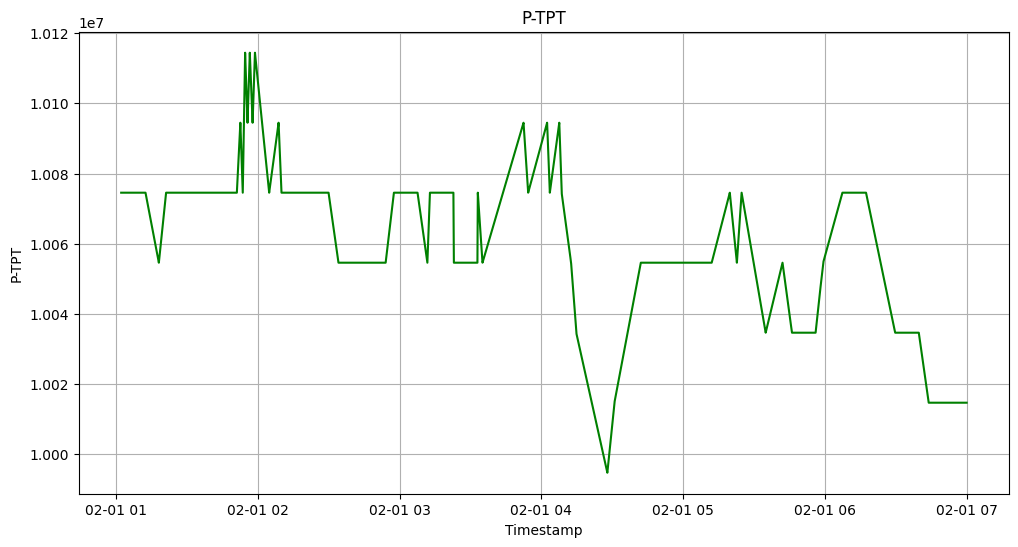

In [5]:
series = sig["P-TPT"]
fig = DataVisualization.plot_series(
    series=series,
    title="P-TPT",
    xlabel="Timestamp",
    ylabel="P-TPT",
    overlay_events=False,
    color="green"
)
fig.show()


#### Multiple Series Example

With `PlotMultipleSeries.plot_multiple_series` you can display several features on the same plot.  
This is helpful when you want to compare signals directly and observe how they evolve together.


/tmp/ipykernel_1941/613254614.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


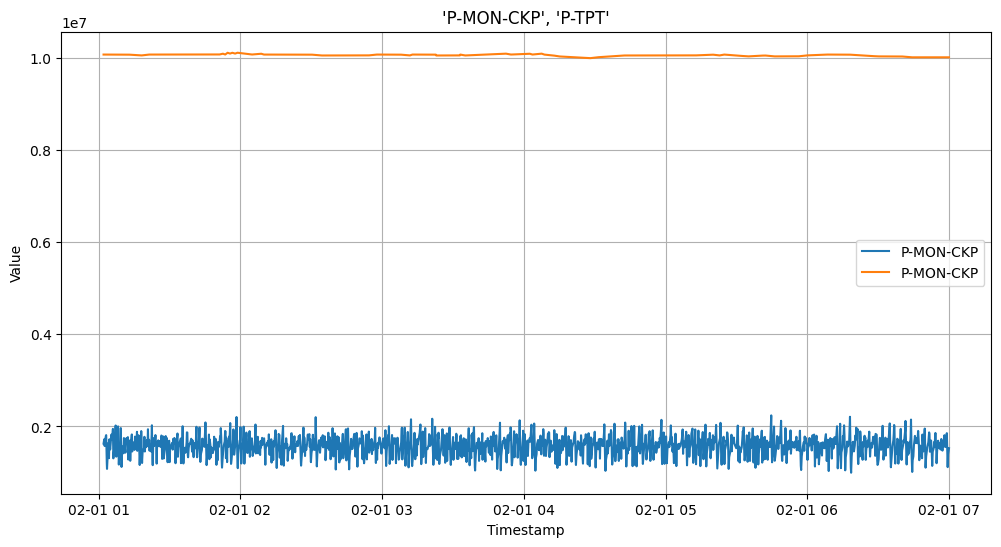

In [6]:
features = ['P-MON-CKP', 'P-TPT']
series_list = [sig[features]]

fig = PlotMultipleSeries.plot_multiple_series(
    series_list=series_list,
    labels=features,
    title="'P-MON-CKP', 'P-TPT'",
    xlabel="Timestamp",
    ylabel="Value"
)
fig.show()


#### Correlation Heatmap Example

Finally, `PlotCorrelationHeatmap.correlation_heatmap` creates a heatmap of pairwise correlations.  
This is a quick way to check which features are strongly related to each other.


/tmp/ipykernel_1941/3210434829.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


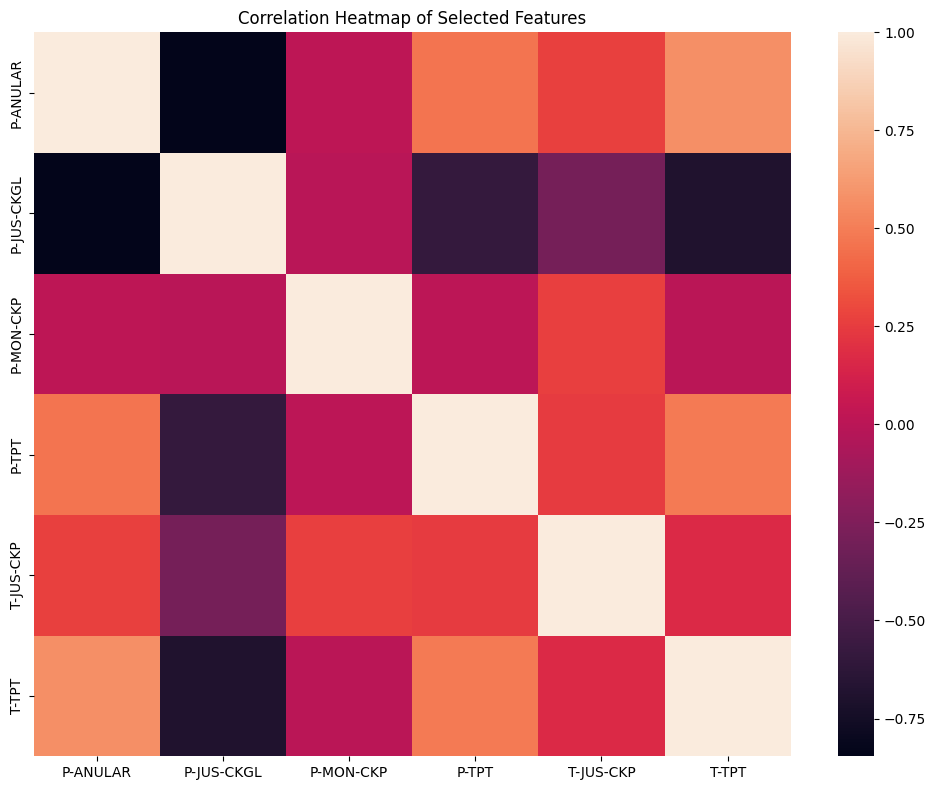

In [7]:
features = ['P-ANULAR', 'P-JUS-CKGL', 'P-MON-CKP', 'P-TPT', 'T-JUS-CKP', 'T-TPT']
subset = sig[features]

fig = PlotCorrelationHeatmap.correlation_heatmap(
    df_of_series=subset,
    title="Correlation Heatmap of Selected Features"
)
fig.show()


------

## 6. Treinamento e avaliação de modelos 

TODO

-------

## 7. Gerando relatório

TODO

-----

## 8. Utilizando o Pipeline automatizado

O 3W Toolkit possui uma estrutura de pipeline pronta para você usar.

O `Pipeline` é formado por componentes prontos ou customizáveis, que você poderá usar para montar sua estrutura de dados.

### 8.1. Estrutura


# TODO: Colocar figura exemplificando os blocos do pipeline

### 8.2. Configurando o Pipeline


Um pipeline é formado por blocos do tipo `BaseStep`. Alguns destes blocos ja estao prontos para serem usados:

* DataLoader  
`step_data_loader = DataLoader(...)`  

* Data processing com ImputeMissingConfig  
`step_imput_missing = ImputeMissingConfig(...)`  

* Data processing com  NormalizeConfig  
`step_normalization = NormalizeConfig(...)`  

* Data processing com RenameColumnsConfig  
`step_rename_columns = RenameColumnsConfig(...)`  

* Data processing com WindowingConfig  
`step_windowing = WindowingConfig(...)`  

  
* TODO: Falta colocar o Trainer + Metrics + Report

TODO: Falta colocar exemplos dos steps e explicação das classes Config do tipo `BaseStep`.


Vamos entao criar um pipeline completo:

TODO: Colocar aqui um exemplo de pipeline completo!


Vamos executar o pipeline:

In [41]:
# TODO:
# pipeline.run()

### 8.3 Executando e avaliando relatório

Agora vamos abrir o report com as métricas obtidas pelo nosso pipeline:

In [42]:
# TODO
# pipeline.report()